In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
link = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(link)

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
data.shape

(25, 2)

In [6]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


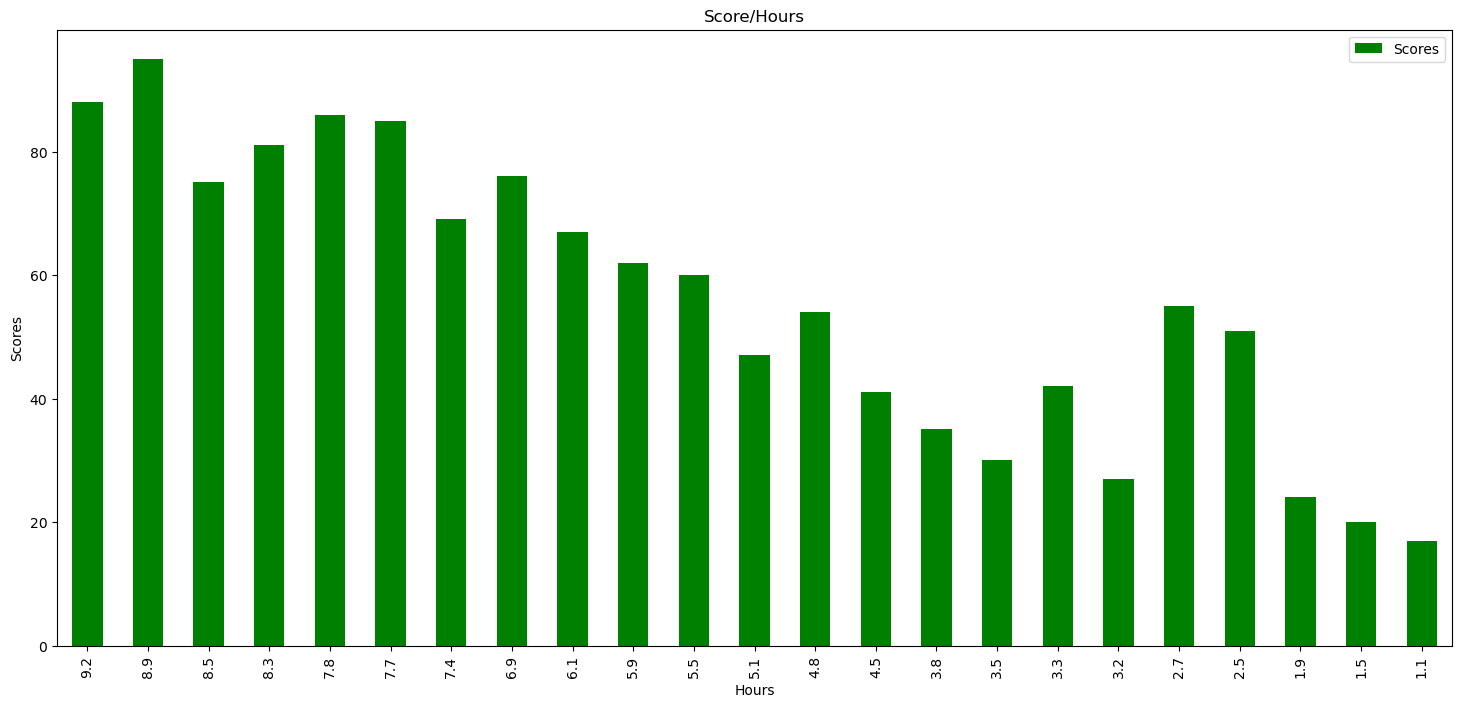

In [8]:
csp = data.groupby("Hours")[["Scores"]].sum().sort_values(by = "Hours", ascending = False)
csp[:].plot.bar(color = ["green"],figsize= (18,8))
plt.title("Score/Hours")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

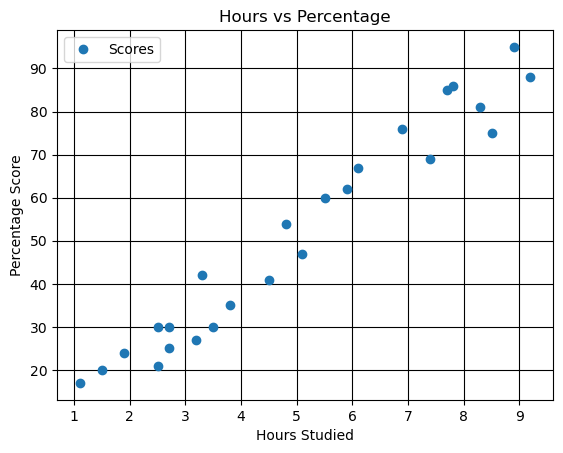

In [9]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.grid(color="black")
plt.show()

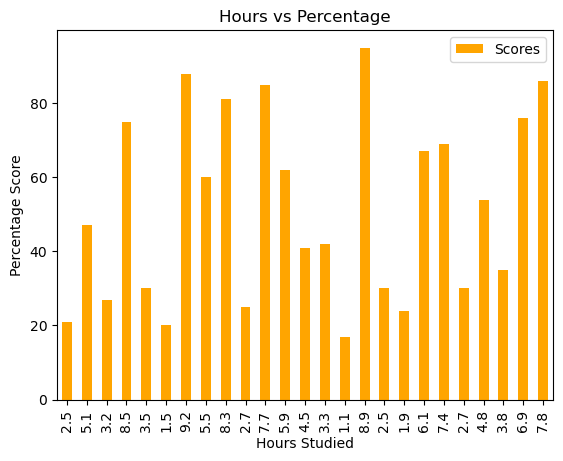

In [10]:
data.plot(x='Hours', y='Scores', style='o',kind='bar',color="orange") 
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [11]:
df = data.copy()

In [12]:
X = df.iloc[:, :-1].values
y = df.Scores 
print(X)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64


In [13]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0) 

In [14]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


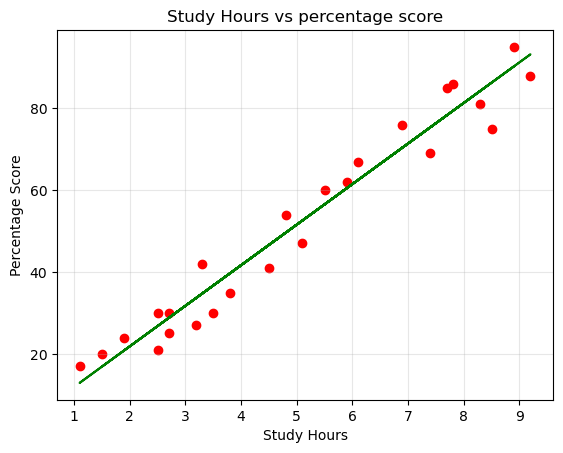

In [15]:
regline=regressor.coef_*X+regressor.intercept_
plt.scatter(X,y, color="red")
plt.plot(X,regline, color='green')
plt.title("Study Hours vs percentage score")
plt.xlabel("Study Hours")
plt.ylabel("Percentage Score")
plt.grid(alpha=0.3)

In [16]:
y_pred=regressor.predict(X_test)

In [19]:
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [17]:
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [18]:
df2=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df2

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


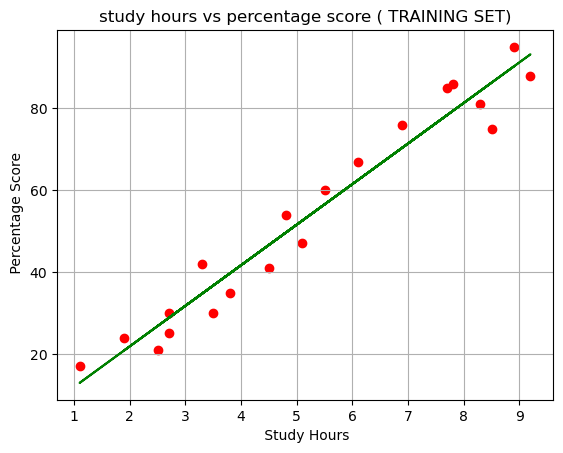

In [20]:
plt.scatter(X_train,y_train,color = 'red')
plt.plot(X_train,regressor.predict(X_train),color = 'green')
plt.title("study hours vs percentage score ( TRAINING SET)")
plt.xlabel(" Study Hours")
plt.ylabel(" Percentage Score")
plt.grid()
plt.show()

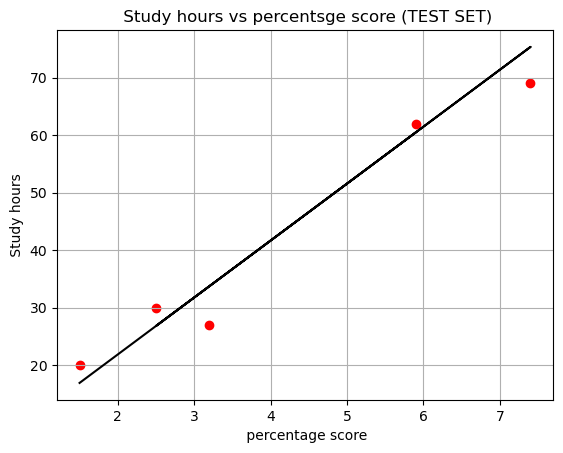

In [21]:
plt.scatter(X_test,y_test,color = 'red')
plt.plot(X_test,regressor.predict(X_test),color = 'black')
plt.title(" Study hours vs percentsge score (TEST SET)")
plt.xlabel(" percentage score")
plt.ylabel( " Study hours ")
plt.grid()
plt.show()

In [ ]:
Study_hours = 9.25
percentage_pred=regressor.predict([[Study_hours]])
print("No of Hours = {}".format(Study_hours))
print("Predicted Score = {}".format(percentage_pred[0]))

# Evaluation the Model

In [22]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


In [ ]:
import seaborn as sns
sns.distplot(y_test-y_pred)

# Improving the model

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df3 = data.copy()
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df3)

In [ ]:
df_scaled

In [ ]:
df4 = pd.DataFrame(df_scaled,columns=[["Hours","score"]])

In [ ]:
X1 = df4.iloc[:, :-1].values
y1 = df4.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X1, y1, 
                            test_size=0.2, random_state=0) 

In [ ]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression() 
regressor.fit(X_train, y_train) 

print("Training complete.")

In [ ]:
regline=regressor.coef_*X1+regressor.intercept_
plt.scatter(X1,y1)
plt.plot(X1,regline, color='green')
plt.title("Study Hours vs percentage score")
plt.xlabel("Study Hours")
plt.ylabel("Percentage Score")
plt.grid(alpha=0.3)

In [ ]:
y_pred=regressor.predict(X_test)
print(y_pred)

In [ ]:
df2=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df2

In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

In [ ]:
Study_hours = 0.98432
percentage_pred=regressor.predict([[Study_hours]])
print("No of Hours = {}".format(Study_hours))
print("Predicted Score = {}".format(percentage_pred[0]))

# Applying Ridge and GridSearchCv to improve our model

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

In [ ]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [ ]:
prediction_ridge=ridge_regressor.predict(X_test)
prediction_ridge

In [ ]:
df2=pd.DataFrame({'Actual':y_test,'Predicted':prediction_ridge})
df2

In [ ]:
import seaborn as sns
sns.distplot(y_test-prediction_ridge)

In [ ]:
import seaborn as sns
sns.distplot(y_test-y_pred)

In [ ]:
Study_hours = 9.25
percentage_pred=ridge_regressor.predict([[Study_hours]])
print("No of Hours = {}".format(Study_hours))
print("Predicted Score = {}".format(percentage_pred[0]))

In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

# Conclusion:

If  scale the data sets our model becomes overfit and if we apply ridge and gridSerchCv our model becomes under fit. So , we concider Linear Regression as a finalised model that is best fitted